In [15]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

In [250]:
cc = np.array(np.random.random((1000,3)))*np.array([.2,2*np.pi,0.]) + np.array([.1,0,0.])

In [251]:
cc = oc.m3b_coord(100,.49,.5,0.,[0,1,0]).T+np.array([8,0,0])

In [252]:
ccgalac = np.array([oc.cart2galactic(c,np.array([8,0,0])) for c in cc])

In [253]:
vvr = np.array([oc.vr_model(c,np.array([5.7,-20.7,5.2,7.1])) for c in ccgalac])
vvl = np.array([oc.vell_model(c,np.array([5.7,-20.7,5.2,7.1])) for c in ccgalac])
vvb = np.array([oc.vb_model(c,np.array([5.7,-20.7,5.2,7.1])) for c in ccgalac])

vvrrg =  np.array([oc.vr_model(c,np.array([11.8,-11.0,0.,-0.])) for c in ccgalac])
vvlrg =np.array([oc.vell_model(c,np.array([11.8,-11.0,-0.,-0.])) for c in ccgalac])
vvbrg =  np.array([oc.vb_model(c,np.array([11.8,-11.0,-0.,0.])) for c in ccgalac])

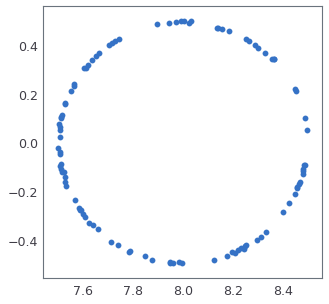

In [254]:
plt.figure(figsize=(5,5))
plt.scatter(cc.T[0],cc.T[1])
plt.show()

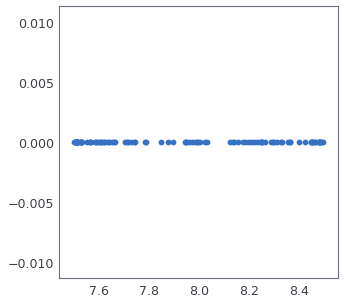

In [255]:
plt.figure(figsize=(5,5))
plt.scatter(cc.T[0],cc.T[2])
plt.show()

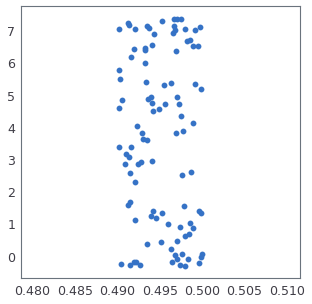

In [256]:
plt.figure(figsize=(5,5))
plt.scatter(ccgalac.T[0],vvr)
plt.show()

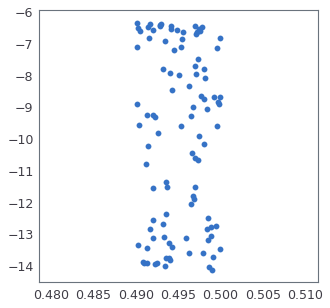

In [257]:
plt.figure(figsize=(5,5))
plt.scatter(ccgalac.T[0],vvl)
plt.show()

In [258]:
def vgalac2vcart(coord_galac,vel_galac):
    vvT = vel_galac.T
    ccT = coord_galac.T
    v_X = -vvT[0]*np.cos(ccT[2])*np.cos(ccT[1]) + vvT[1]*np.sin(ccT[1]) + vvT[2]*np.sin(ccT[2])*np.cos(ccT[1])
    v_Y = -vvT[0]*np.cos(ccT[2])*np.sin(ccT[1]) - vvT[1]*np.cos(ccT[1]) + vvT[2]*np.sin(ccT[2])*np.sin(ccT[1])
    v_Z = vvT[0]*np.sin(ccT[2]) + vvT[2]*np.cos(ccT[2])
    return np.array([v_X, v_Y, v_Z])

In [259]:
def cgalac2ccart(coord_galac):
    ccT = coord_galac.T
    XX = 8. - ccT[0]*np.cos(ccT[1])*np.cos(ccT[2])
    YY =    - ccT[0]*np.sin(ccT[1])*np.cos(ccT[2])
    ZZ =      ccT[0]*np.sin(ccT[2])
    return np.array([XX, YY, ZZ])

In [260]:
vvgalac = np.array([[vvr[i],vvl[i],vvb[i]] for i in range(len(vvrrg))])
vvgalacrg = np.array([[vvrrg[i],vvlrg[i],vvbrg[i]] for i in range(len(vvrrg))])

In [261]:
cccart = cgalac2ccart(ccgalac)

In [262]:
vvcart = vgalac2vcart(ccgalac,vvgalac)
vvcartrg = vgalac2vcart(ccgalac,vvgalacrg)

<function matplotlib.pyplot.plot>

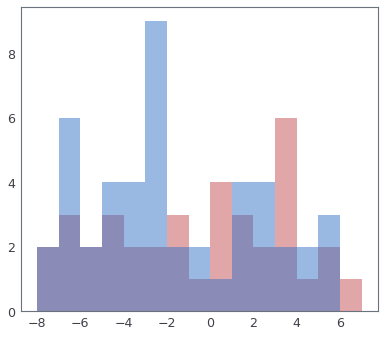

In [263]:
plt.hist(vvcart[0],bins=range(-8,8),alpha=.5,color='r')
plt.hist(vvcartrg[0],bins=range(-8,8),color='b',alpha=.5)
plt.plot

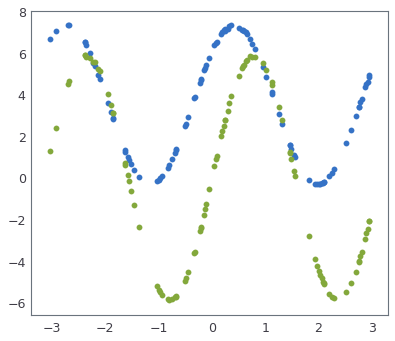

In [264]:
plt.scatter(ccgalac.T[1],vvr)
plt.scatter(ccgalac.T[1],vvrrg)

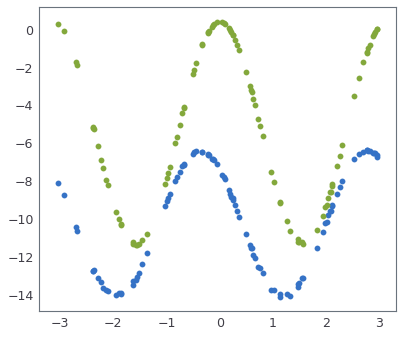

In [265]:
plt.scatter(ccgalac.T[1],vvl)
plt.scatter(ccgalac.T[1],vvlrg)

In [266]:
xxvv_cart = np.array([np.append(cccart.T[i],vvcart.T[i]*mt.C.km.express(mt.C.kpc)) for i in range(len(cccart[0]))])
xxvv_cartrg = np.array([np.append(cccart.T[i],vvcartrg.T[i]*mt.C.km.express(mt.C.kpc)) for i in range(len(cccart[0]))])

In [267]:
0.0199009793340327*2.65860467535e+15/60/60/24/365.25/1e6

1.6765798635353466

In [268]:
def RK4(xxvv,time_step=h):

    k_1 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv))
    xxvv_1 = xxvv+k_1*h/2

    k_2 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv_1))
    xxvv_2 = xxvv+k_2*h/2

    k_3 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv_2))
    xxvv_3 = xxvv+k_3*h

    k_4 = np.array(map(lambda xv: np.append(xv[3::],mt.force_T(xv[0],xv[1],xv[2])),xxvv_3))

    xxvv = xxvv + h/6.*(k_1+2.*k_2+2.*k_3+k_4)

    return xxvv

In [269]:
np.array([[vvr[i],vvl[i],vvb[i]] for i in range(len(vvrrg))])+mt.vel_circ(np.array([8.,0.,0.]),mt.force_T)*mt.C.kpc.express(mt.C.km)

array([[ 3.62106972e+00, -2.26317251e+02,  0.00000000e+00],
       [ 1.56047600e+00, -2.33515810e+02,  0.00000000e+00],
       [ 7.14617528e+00, -2.28936752e+02,  0.00000000e+00],
       [ 8.87756227e-01, -2.27427425e+02,  0.00000000e+00],
       [ 2.94935696e+00, -2.26371118e+02,  0.00000000e+00],
       [ 6.51013515e+00, -2.32691277e+02,  0.00000000e+00],
       [ 7.05293528e+00, -2.28675153e+02,  0.00000000e+00],
       [ 5.17244968e+00, -2.26762997e+02,  0.00000000e+00],
       [ 6.61833586e-01, -2.32782465e+02,  0.00000000e+00],
       [ 4.67047377e-01, -2.27893934e+02,  0.00000000e+00],
       [ 3.82581152e+00, -2.26378223e+02,  0.00000000e+00],
       [ 4.59897594e+00, -2.26448251e+02,  0.00000000e+00],
       [ 9.77646180e-01, -2.33038796e+02,  0.00000000e+00],
       [ 1.57914510e+00, -2.33358013e+02,  0.00000000e+00],
       [-2.84016181e-01, -2.29729475e+02,  0.00000000e+00],
       [ 7.16865624e+00, -2.29173177e+02,  0.00000000e+00],
       [-2.57055768e-01, -2.29484336e+02

In [270]:
vvgalac = np.array([[vvr[i],vvl[i],vvb[i]] for i in range(len(vvrrg))])
vvgalacrg = np.array([[vvrrg[i],vvlrg[i],vvbrg[i]] for i in range(len(vvrrg))])

cccart = cgalac2ccart(ccgalac)

vvcart = vgalac2vcart(ccgalac,vvgalac)
vvcartrg = vgalac2vcart(ccgalac,vvgalacrg)

In [271]:
xxvv_cart = np.array([np.append(cccart.T[i],vvcart.T[i]*mt.C.km.express(mt.C.kpc)+mt.vel_circ(np.array([8.,0.,0.]),mt.force_T)) for i in range(len(cccart[0]))])
xxvv_cartrg = np.array([np.append(cccart.T[i],vvcartrg.T[i]*mt.C.km.express(mt.C.kpc)+mt.vel_circ(np.array([8.,0.,0.]),mt.force_T)) for i in range(len(cccart[0]))])

In [272]:
NT = 20
h = 0.0199009793340327*2.65860467535e+15/NT
xxvv_n = xxvv_cart
rv_LSRn = np.append(np.array([8.,0.,0.]),mt.vel_circ(np.array([8.,0.,0.]),mt.force_T))
with mt.contextlib.closing(mt.Pool()) as pool:
            for nt in range(NT):
                rv_LSRn = RK4([rv_LSRn])[0]
                xxvv_n = list(pool.map(RK4,[xxvv_n])[0])

In [273]:
ror = [resultados,resultadosrg]

In [274]:
resultados = [xxvv_cart]
resultadosrg = [xxvv_cartrg]
LSRs = [np.append(np.array([8.,0.,0.]),mt.vel_circ(np.array([8.,0.,0.]),mt.force_T))]
NT = 200
h = 0.0199009793340327*2.65860467535e+15/NT
on= 10 
for i in range(on):
    rv_LSRn = LSRs[-1]
    xxvv_n = resultados[-1]
    xxvv_nrg = resultadosrg[-1]
    with mt.contextlib.closing(mt.Pool()) as pool:
                for nt in range(NT):
                    rv_LSRn = RK4([rv_LSRn])[0]
                    xxvv_n = list(pool.map(RK4,[xxvv_n])[0])
                    xxvv_nrg = list(pool.map(RK4,[xxvv_nrg])[0])
    resultados.append(xxvv_n)
    resultadosrg.append(xxvv_nrg)
    LSRs.append(rv_LSRn)

In [275]:
import matplotlib.animation as animation

<Figure size 432x288 with 0 Axes>

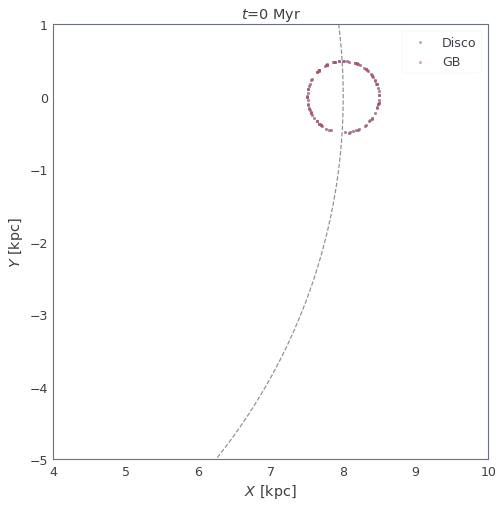

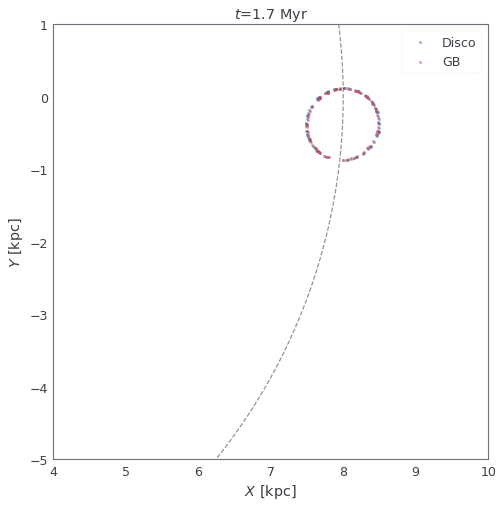

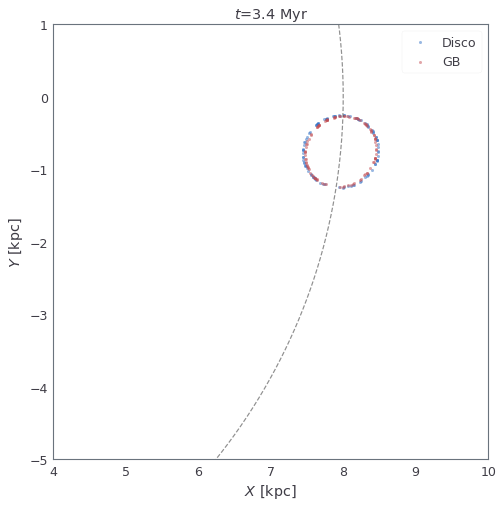

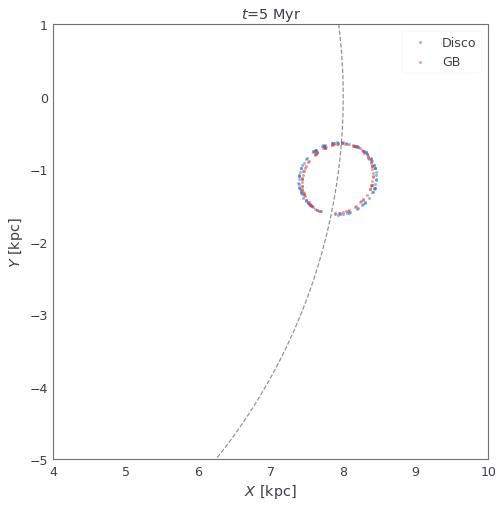

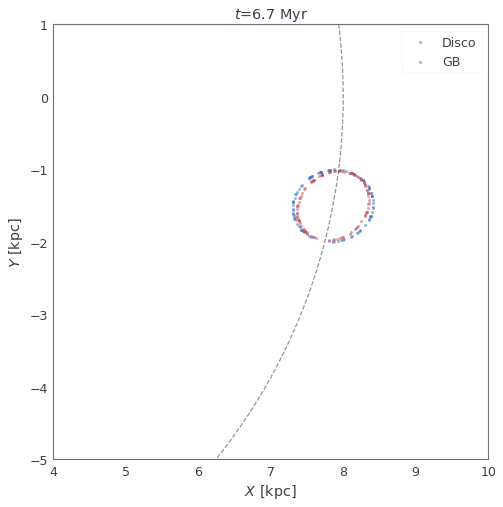

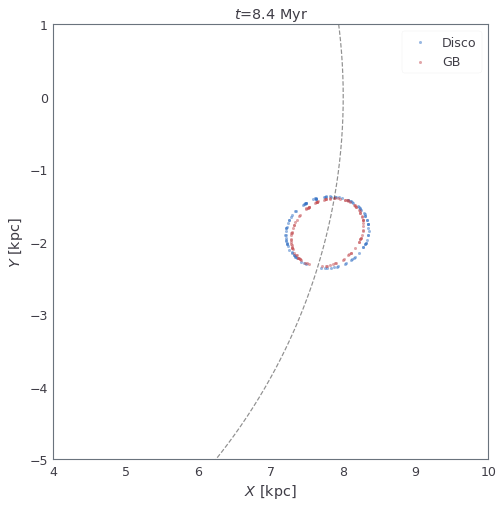

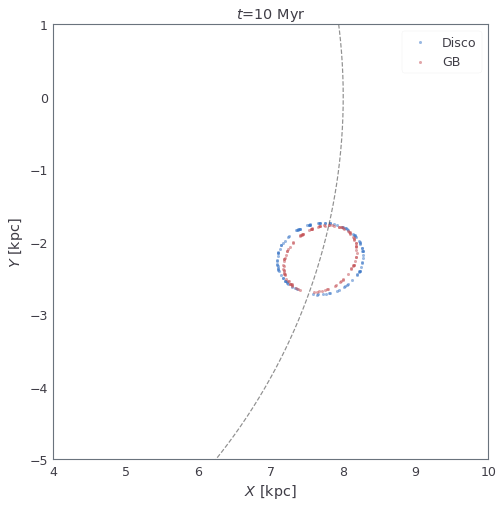

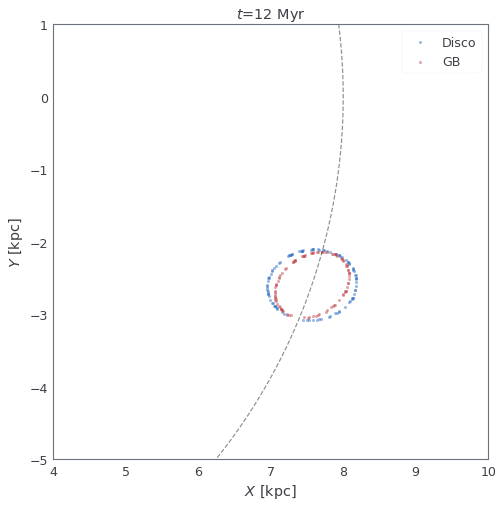

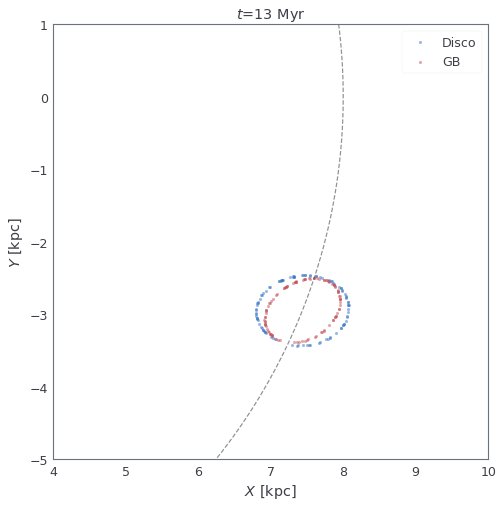

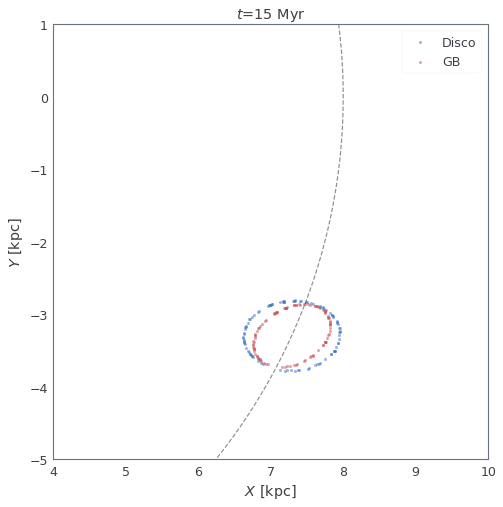

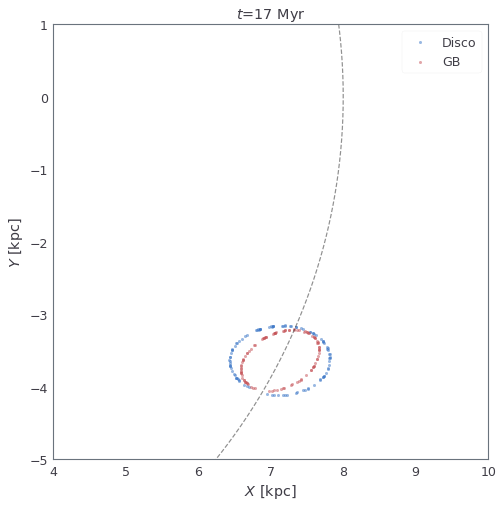

In [120]:
fig = plt.figure()

ims = []
for ic in range(len(resultados)):
    plt.figure(figsize=(8,8))
    plt.plot(8*np.cos(auxtt),8*np.sin(auxtt),ls="--",c='k',alpha=.5)
    #plt.scatter(np.array(resultados[0]).T[0],np.array(resultados[0]).T[1],c="k",alpha=.5,s=8)
    plt.scatter(np.array(resultados[ic]).T[0],np.array(resultados[ic]).T[1],c="b",alpha=.5,s=8,label="Disco")
    plt.scatter(np.array(resultadosrg[ic]).T[0],np.array(resultadosrg[ic]).T[1],c="r",alpha=.5,s=8,label="GB")
    plt.xlim(4,10)
    plt.ylim(-5,1)
    plt.xlabel("$X$ [kpc]")
    plt.ylabel("$Y$ [kpc]")
    plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.show()

In [276]:
mt.vel_circ([8,0,0],mt.force_T)/8

array([ 0.00000000e+00, -8.90866151e-16,  0.00000000e+00])

In [277]:
auxtt2 = np.linspace(-np.pi,np.pi,200)

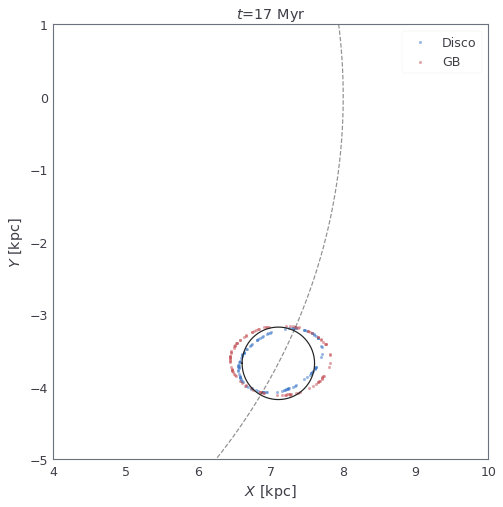

In [279]:
ic=10
plt.figure(figsize=(8,8))
plt.plot(8*np.cos(auxtt),8*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(.5*np.cos(auxtt2)+8*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),.5*np.sin(auxtt2)+8*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),ls="-",c='k',alpha=1)
plt.scatter(np.array(resultadosrg[ic]).T[0],np.array(resultadosrg[ic]).T[1],c="b",alpha=.5,s=8,label="Disco")
plt.scatter(np.array(resultados[ic]).T[0],np.array(resultados[ic]).T[1],c="r",alpha=.5,s=8,label="GB")
plt.xlim(4,10)
plt.ylim(-5,1)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

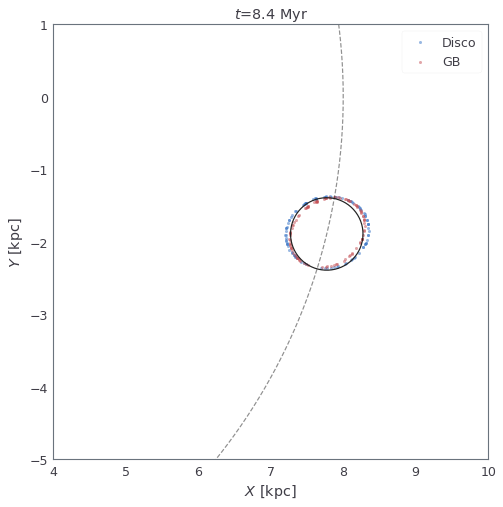

In [249]:
ic=5
plt.figure(figsize=(8,8))
plt.plot(8*np.cos(auxtt),8*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(.5*np.cos(auxtt2)+8*np.cos(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),.5*np.sin(auxtt2)+8*np.sin(-8.90866151e-16*60*60*24*365*1e6*1.7*ic),ls="-",c='k',alpha=1)
plt.scatter(np.array(resultados[ic]).T[0],np.array(resultados[ic]).T[1],c="b",alpha=.5,s=8,label="Disco")
plt.scatter(np.array(resultadosrg[ic]).T[0],np.array(resultadosrg[ic]).T[1],c="r",alpha=.5,s=8,label="GB")
plt.xlim(4,10)
plt.ylim(-5,1)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [109]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

Traceback (most recent call last):
  File "/fs/titan/other0/local/i386_64-centos-7/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/fs/titan/other0/local/i386_64-centos-7/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/fs/titan/other0/local/i386_64-centos-7/anaconda2/lib/python2.7/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/fs/titan/other0/local/i386_64-centos-7/anaconda2/lib/python2.7/site-packages/matplotlib/animation.py", line 1565, in _init_draw
    fig.canvas.draw_idle()
AttributeError: 'NoneType' object has no attribute 'canvas'


In [91]:
auxtt = np.linspace(np.pi/4,-np.pi/2,500)

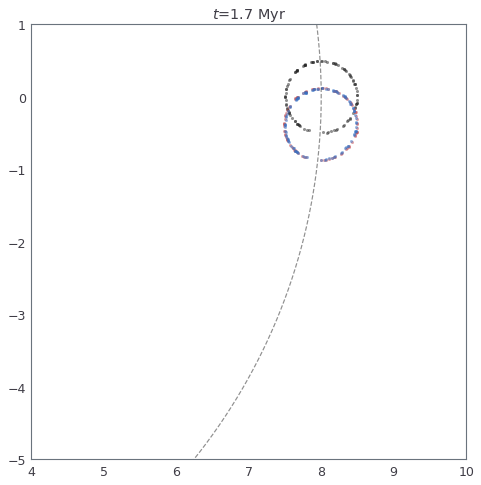

In [106]:
ic = 1
plt.figure(figsize=(8,8))

#plt.scatter(cccart[0],cccart[1],c="r",alpha=.5)
#plt.scatter([8],[0],c="k",alpha=1)
#plt.scatter(rv_LSRn[0],rv_LSRn[1],c="k",alpha=.5)
plt.plot(8*np.cos(auxtt),8*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.scatter(np.array(resultados[0]).T[0],np.array(resultados[0]).T[1],c="k",alpha=.5,s=8)
plt.scatter(np.array(resultados[ic]).T[0],np.array(resultados[ic]).T[1],c="r",alpha=.5,s=8)
plt.scatter(np.array(resultadosrg[ic]).T[0],np.array(resultadosrg[ic]).T[1],c="b",alpha=.5,s=8)
plt.xlim(4,10)
plt.ylim(-5,1)
plt.title("$t$=%.2g Myr"%(ic*0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6))
plt.gca().set_aspect('equal')
plt.show()

In [121]:
ls

cloud_pass.ipynb  gif/                       rut_oc_sim.ipynb  Untitled2.ipynb
currdir.tar       maketar_from_curdir.ipynb  Untitled1.ipynb   Untitled.ipynb


In [138]:
more info_mp_marbles_06102020-060610

In [132]:
ls

info_mp_marbles_06102020-060610       mp_marbles_12102020-012658LSR
info_mp_marbles_12102020-032303       mp_marbles_12102020-012658_script.py
mp_marbles_06102020-060610            mp_marbles_12102020-032303
mp_marbles_06102020-060610LSR         mp_marbles_12102020-032303LSR
mp_marbles_06102020-060610_script.py  mp_marbles_12102020-032303_script.py
mp_marbles_12102020-012658


In [140]:
cd /fs/nas14/other0/gilgo/gould_belt/

/fs/nas14/other0/gilgo/gould_belt


In [155]:
mt.basedir

'/fs/nas14/other0/gilgo/gould_belt/patch_geom_amr/vertical/'

In [156]:
mt.basedir = "/fs/nas14/other0/gilgo/gould_belt/patch_geom_amr/vertical"

In [163]:
op11 = mt.rop(op=12,limits=(0.6,0.85,0.375,0.625,0.375,0.625))

Computing hilbert minimal domain description for output 12 ...
Done !

 Succesfully read the output file 12. 

Computing hilbert minimal domain description for output 13 ...
Done !


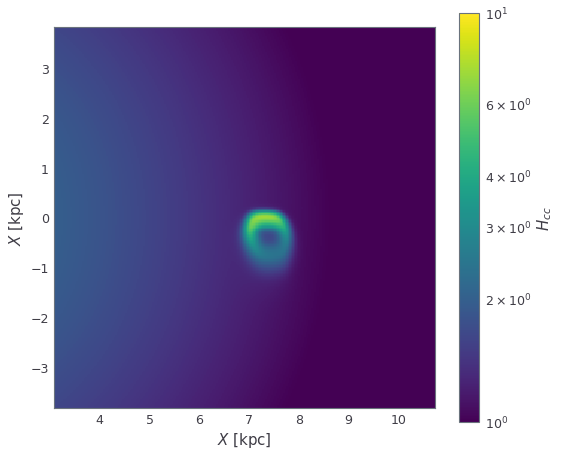

In [179]:
mt.imshow(op11.dd[op11.nz/2,:,:],extentto=(op11.xx[0],op11.xx[-1],op11.yy[0],op11.yy[-1]),zlims=(1,10),xlab="$X$ [kpc]",ylab="$X$ [kpc]",logscale=True,colorbar=True,figsize=(8,8),zlab="$H_{cc}$")

In [188]:
cd /fs/nas14/other0/cbenitez/

/fs/nas14/other0/cbenitez


In [213]:
ls

info_mp_marbles_06102020-060610       mp_marbles_12102020-012658LSR
info_mp_marbles_12102020-032303       mp_marbles_12102020-012658_script.py
mp_marbles_06102020-060610            mp_marbles_12102020-032303
mp_marbles_06102020-060610LSR         mp_marbles_12102020-032303LSR
mp_marbles_06102020-060610_script.py  mp_marbles_12102020-032303_script.py
mp_marbles_12102020-012658


In [186]:
more oort_cons.py

In [185]:
import oort_cons as oc

In [203]:
oo = np.load("rut_caso39.npy")

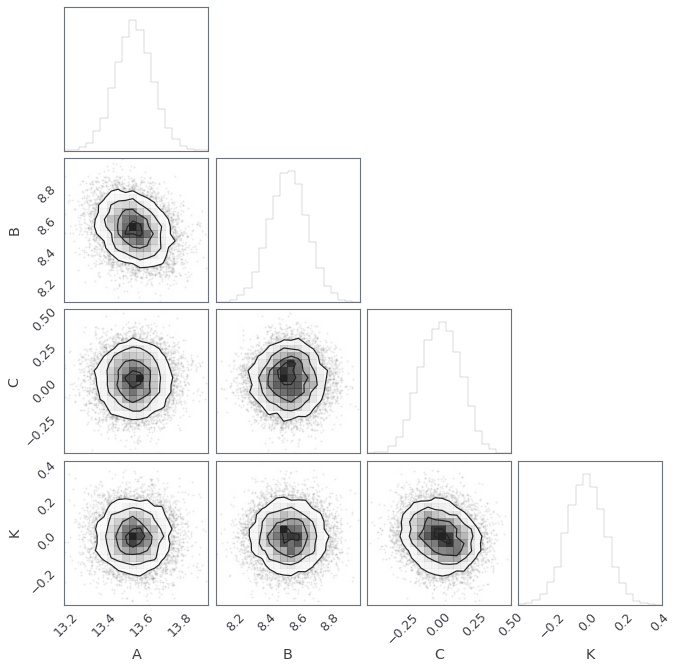

In [208]:
oc.plot_corner(oo[8])